In [2]:
import os, sqlite3
from pickle import loads
import matplotlib.pyplot as plt

def plot_design_space(db_file):
    conn = sqlite3.connect(db_file)
    conn.row_factory = sqlite3.Row
    cur = conn.cursor()
    cur.execute("select run_time, data from result inner join configuration on result.configuration_id = configuration.id;")
    rows = cur.fetchall()
    latencies = []
    factors = []
    for row in rows:
        factor = list(loads(row['data']).values())[0]
        latencies.append(row['run_time'])
        factors.append(factor)
    conn.close()
    factors, latencies = zip(*sorted(zip(factors, latencies)))
    plt.plot(factors, latencies, marker = 'o')
    plt.title('Cholesky decomposition')
    plt.ylim(0, 1.1 * max(latencies))
    plt.xlabel('Unroll factor')
    plt.ylabel('Latency (cycles)')
    plt.show()

# Original implementation

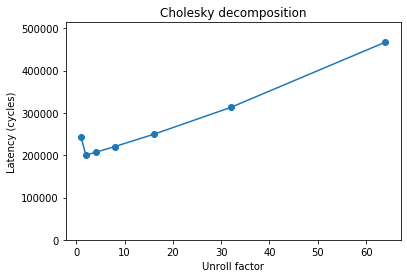

In [2]:
plot_design_space(os.path.join('results', '20190919_cholesky.db'))

# Modified implementation with associative FP adds, exit checks removed, and array partitioning tied to unroll factor

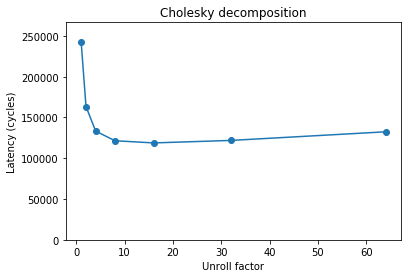

In [4]:
plot_design_space(os.path.join('results', '20190920_cholesky_modified.db'))